In [42]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

In [43]:
with_mask_files = os.listdir("/kaggle/input/face-mask-dataset/data/with_mask")

In [44]:
without_mask_files = os.listdir("/kaggle/input/face-mask-dataset/data/without_mask")

In [45]:
len(with_mask_files)

3725

In [46]:
len(without_mask_files)

3828

In [47]:
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [48]:
labels = with_mask_labels + without_mask_labels

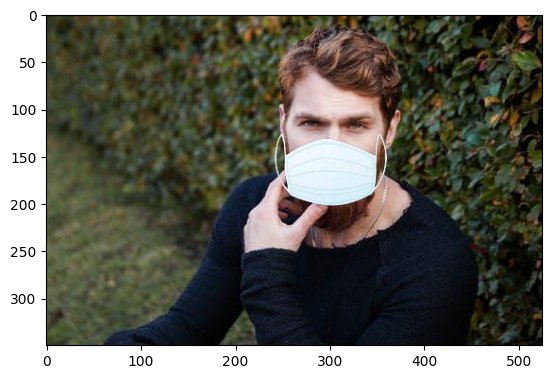

In [49]:
img = mpimg.imread("/kaggle/input/face-mask-dataset/data/with_mask/with_mask_1.jpg")
imgplot = plt.imshow(img)
plt.show()

**convert image into numpy array + resize + RGB**

In [50]:
with_mask_path = "/kaggle/input/face-mask-dataset/data/with_mask/"

data = []
for img_file in with_mask_files:
    image = Image.open(with_mask_path+img_file)   #cv2.imread(with_mask_path+img_file)
    
    image = image.resize((128,128))               #cv2.resize(image,(128,128))
    
    image = image.convert("RGB")                 #cv2.cvtColor(image,COLOR_BGR2RGB)
    image = np.array(image)
    data.append(image)

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [51]:
without_mask_path = "/kaggle/input/face-mask-dataset/data/without_mask/"

#data is removed ,as it also append in that data list
for img_file in without_mask_files:
    image = Image.open(without_mask_path+img_file)   #cv2.imread(without_mask_path+img_file)
    
    image = image.resize((128,128))                #cv2.resize(image,(128,128))
    
    image = image.convert("RGB")                 #cv2.cvtColor(image,COLOR_BGR2RGB)
    image = np.array(image)
    data.append(image)

In [52]:
len(data)

7553

In [53]:
type(data)

list

In [54]:
data[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [254, 254, 254],
        [253, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [252, 253, 254],
        [246, 139, 136],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [212, 175, 154],
        [218, 187, 172],
        [250, 247, 245]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [212, 175, 154],
        [220, 191, 175],
        [252, 250, 248]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [211, 174, 155],
        [219, 194, 180],
        [252, 251, 250]]

In [55]:
data[0].shape

(128, 128, 3)

In [56]:
X = np.array(data)
Y = np.array(labels)

In [57]:
print(Y)

[1 1 1 ... 0 0 0]


In [58]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [59]:
X_train.shape

(6042, 128, 128, 3)

In [60]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [61]:
X_train_scaled.shape

(6042, 128, 128, 3)

In [62]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [66]:
model = Sequential()

model.add(Conv2D(32,kernel_size = (3,3), activation = 'relu', input_shape=(128,128,3) ))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64,kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation = 'sigmoid'))

In [67]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

In [70]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - acc: 0.8673 - loss: 0.2814 - val_acc: 0.9240 - val_loss: 0.2078
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - acc: 0.8828 - loss: 0.2661 - val_acc: 0.9041 - val_loss: 0.2472
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - acc: 0.9043 - loss: 0.2303 - val_acc: 0.9058 - val_loss: 0.2276
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - acc: 0.8969 - loss: 0.2332 - val_acc: 0.9223 - val_loss: 0.2192
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - acc: 0.9120 - loss: 0.2144 - val_acc: 0.9223 - val_loss: 0.2129
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - acc: 0.9120 - loss: 0.1909 - val_acc: 0.9174 - val_loss: 0.2333
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - acc: 0.9102 - loss: 0.1976 - val_acc: 0.9372 - val_loss: 0.1904
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - acc: 0.9281 - loss: 0.1570 - val_acc: 0.9372 - val_loss: 0.1810
Epoch 9/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/

In [75]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9192 - loss: 0.2131


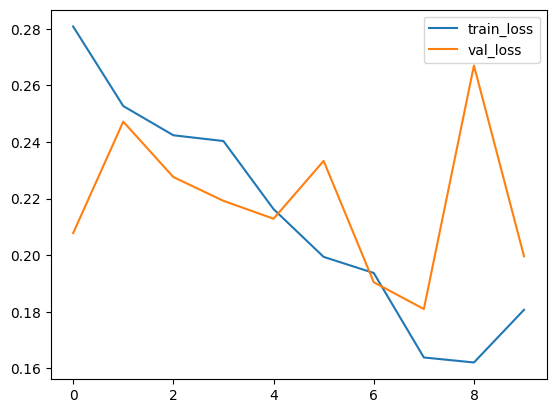

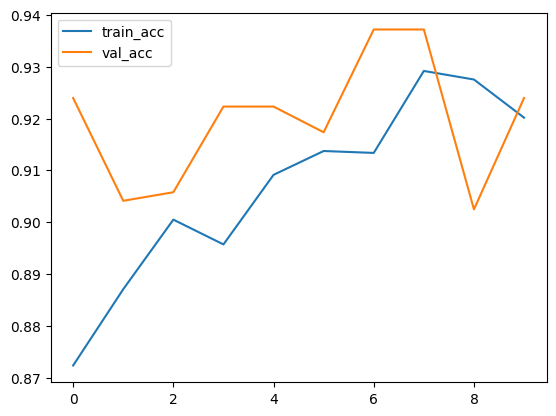

In [72]:
plt.plot(history.history['loss'],label = 'train_loss')
plt.plot(history.history['val_loss'],label = 'val_loss')
plt.legend()
plt.show()

plt.plot(history.history['acc'],label = 'train_acc')
plt.plot(history.history['val_acc'],label = 'val_acc')
plt.legend()
plt.show()

In [74]:
model.save("model.h5")